In [1]:
#load all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('raw_sales.csv')

Data Cleaning

Handling missing values

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29580 entries, 0 to 29579
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   datesold      29580 non-null  object
 1   postcode      29580 non-null  int64 
 2   price         29580 non-null  int64 
 3   propertyType  29580 non-null  object
 4   bedrooms      29580 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB


In [4]:
df.head()

,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07 00:00:00,2607,525000,house,4
1,2007-02-27 00:00:00,2906,290000,house,3
2,2007-03-07 00:00:00,2905,328000,house,3
3,2007-03-09 00:00:00,2905,380000,house,4
4,2007-03-21 00:00:00,2906,310000,house,3


In [5]:
df.isnull().sum()

datesold        0
postcode        0
price           0
propertyType    0
bedrooms        0
dtype: int64

In [6]:
df.datesold=pd.to_datetime(df.datesold)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29580 entries, 0 to 29579
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   datesold      29580 non-null  datetime64[ns]
 1   postcode      29580 non-null  int64         
 2   price         29580 non-null  int64         
 3   propertyType  29580 non-null  object        
 4   bedrooms      29580 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 1.1+ MB


In [8]:
df['year']=df.datesold.dt.year
df['month']=df.datesold.dt.month
df['day']=df.datesold.dt.day

In [9]:
df.head()

,datesold,postcode,price,propertyType,bedrooms,year,month,day
0,2007-02-07,2607,525000,house,4,2007,2,7
1,2007-02-27,2906,290000,house,3,2007,2,27
2,2007-03-07,2905,328000,house,3,2007,3,7
3,2007-03-09,2905,380000,house,4,2007,3,9
4,2007-03-21,2906,310000,house,3,2007,3,21


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29580 entries, 0 to 29579
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   datesold      29580 non-null  datetime64[ns]
 1   postcode      29580 non-null  int64         
 2   price         29580 non-null  int64         
 3   propertyType  29580 non-null  object        
 4   bedrooms      29580 non-null  int64         
 5   year          29580 non-null  int64         
 6   month         29580 non-null  int64         
 7   day           29580 non-null  int64         
dtypes: datetime64[ns](1), int64(6), object(1)
memory usage: 1.8+ MB


No missing value

EDA

Anomalies

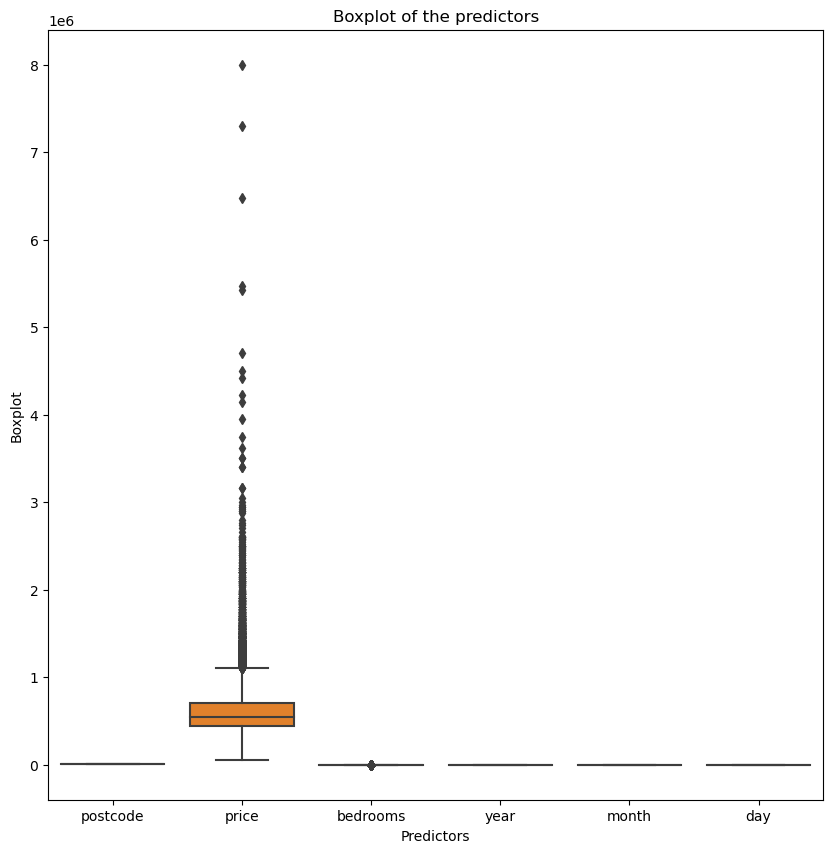

In [24]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.boxplot(data=df.drop(columns=['datesold']),ax=ax)
plt.xlabel("Predictors")
plt.ylabel("Boxplot")
plt.title("Boxplot of the predictors");

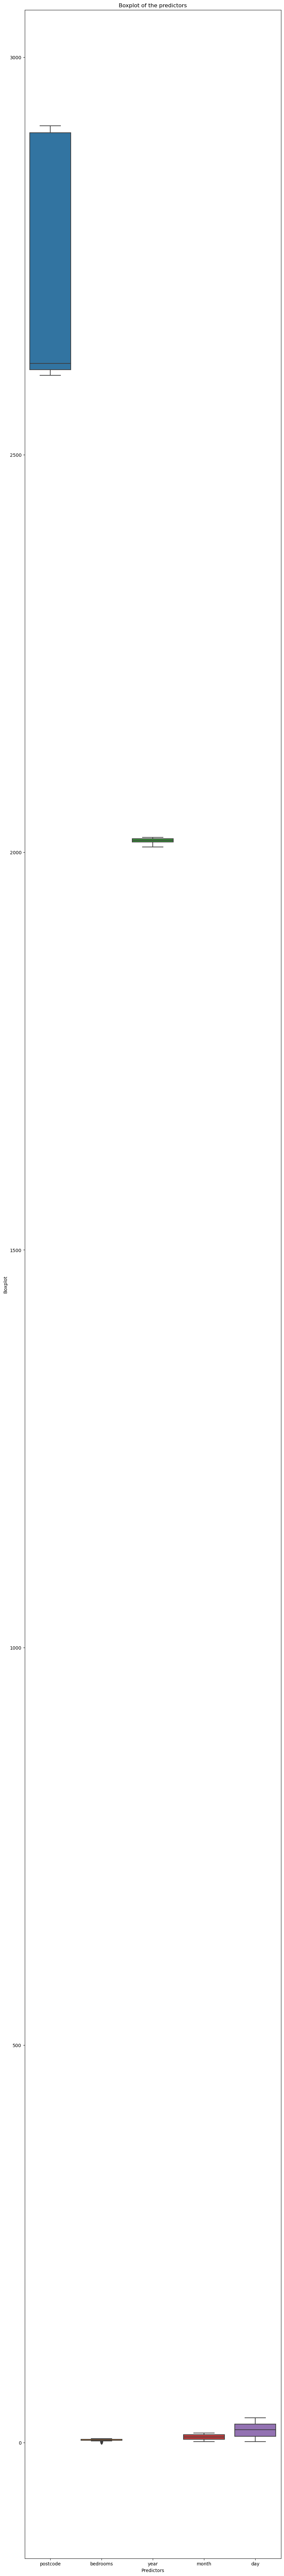

In [22]:
fig, ax = plt.subplots(figsize=(10, 100))
sns.boxplot(data=df.drop(columns=['datesold','price']),ax=ax)
plt.xlabel("Predictors")
plt.ylabel("Boxplot")
plt.title("Boxplot of the predictors");

The outliers are mostly in price variable

In [26]:
import statistics
# Function to Detection Outlier on one-dimentional datasets.
def find_anomalies(data):
    #define a list to accumlate anomalies
    anomalies = []
    
    # Set upper and lower limit to 3 standard deviation
    random_data_std = statistics.stdev(data)
    random_data_mean = statistics.mean(data)
    # 3-standard deviation
    
    anomaly_cut_off = random_data_std * 3
    
    lower_limit  = random_data_mean - anomaly_cut_off 
    upper_limit = random_data_mean + anomaly_cut_off
    
    # Generate outliers
    for outlier in data:
        if outlier > upper_limit or outlier < lower_limit:
            anomalies.append(outlier)
    return anomalies

In [30]:
#count no of outliers
df = df.drop(columns=['datesold'])
for i,j in df.items():
    if df[i].dtypes != 'O':
        #make sure it is not object type and apply fillna
        print('Column Name : ', i)
        print('No of outliers : ', len(find_anomalies(df[i].fillna(0))))
        print('Outliers % : ', round(len(find_anomalies(df[i].fillna(0)))/df.shape[0]*100,2))
        #if it is a float type, convert to int
        if df[i].dtypes == 'float64':
            print('Column Name : ', i)
            print('No of outliers : ', len(find_anomalies(df[i].fillna(0).astype(int))))
            print('Outliers % : ', round(len(find_anomalies(df[i].fillna(0).astype(int)))/df.shape[0]*100,2))

Column Name :  postcode
No of outliers :  0
Outliers % :  0.0
Column Name :  price
No of outliers :  461
Outliers % :  1.56
Column Name :  bedrooms
No of outliers :  30
Outliers % :  0.1
Column Name :  year
No of outliers :  0
Outliers % :  0.0
Column Name :  month
No of outliers :  0
Outliers % :  0.0
Column Name :  day
No of outliers :  0
Outliers % :  0.0


C:\Users\oggy0\AppData\Local\Temp\ipykernel_9936\2274751241.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax=df.corr()['price'].sort_values(ascending=False).plot(kind='bar')


[Text(0, 0, '1.000'),
 Text(0, 0, '0.484'),
 Text(0, 0, '0.172'),
 Text(0, 0, '0.029'),
 Text(0, 0, '0.001'),
 Text(0, 0, '-0.151')]

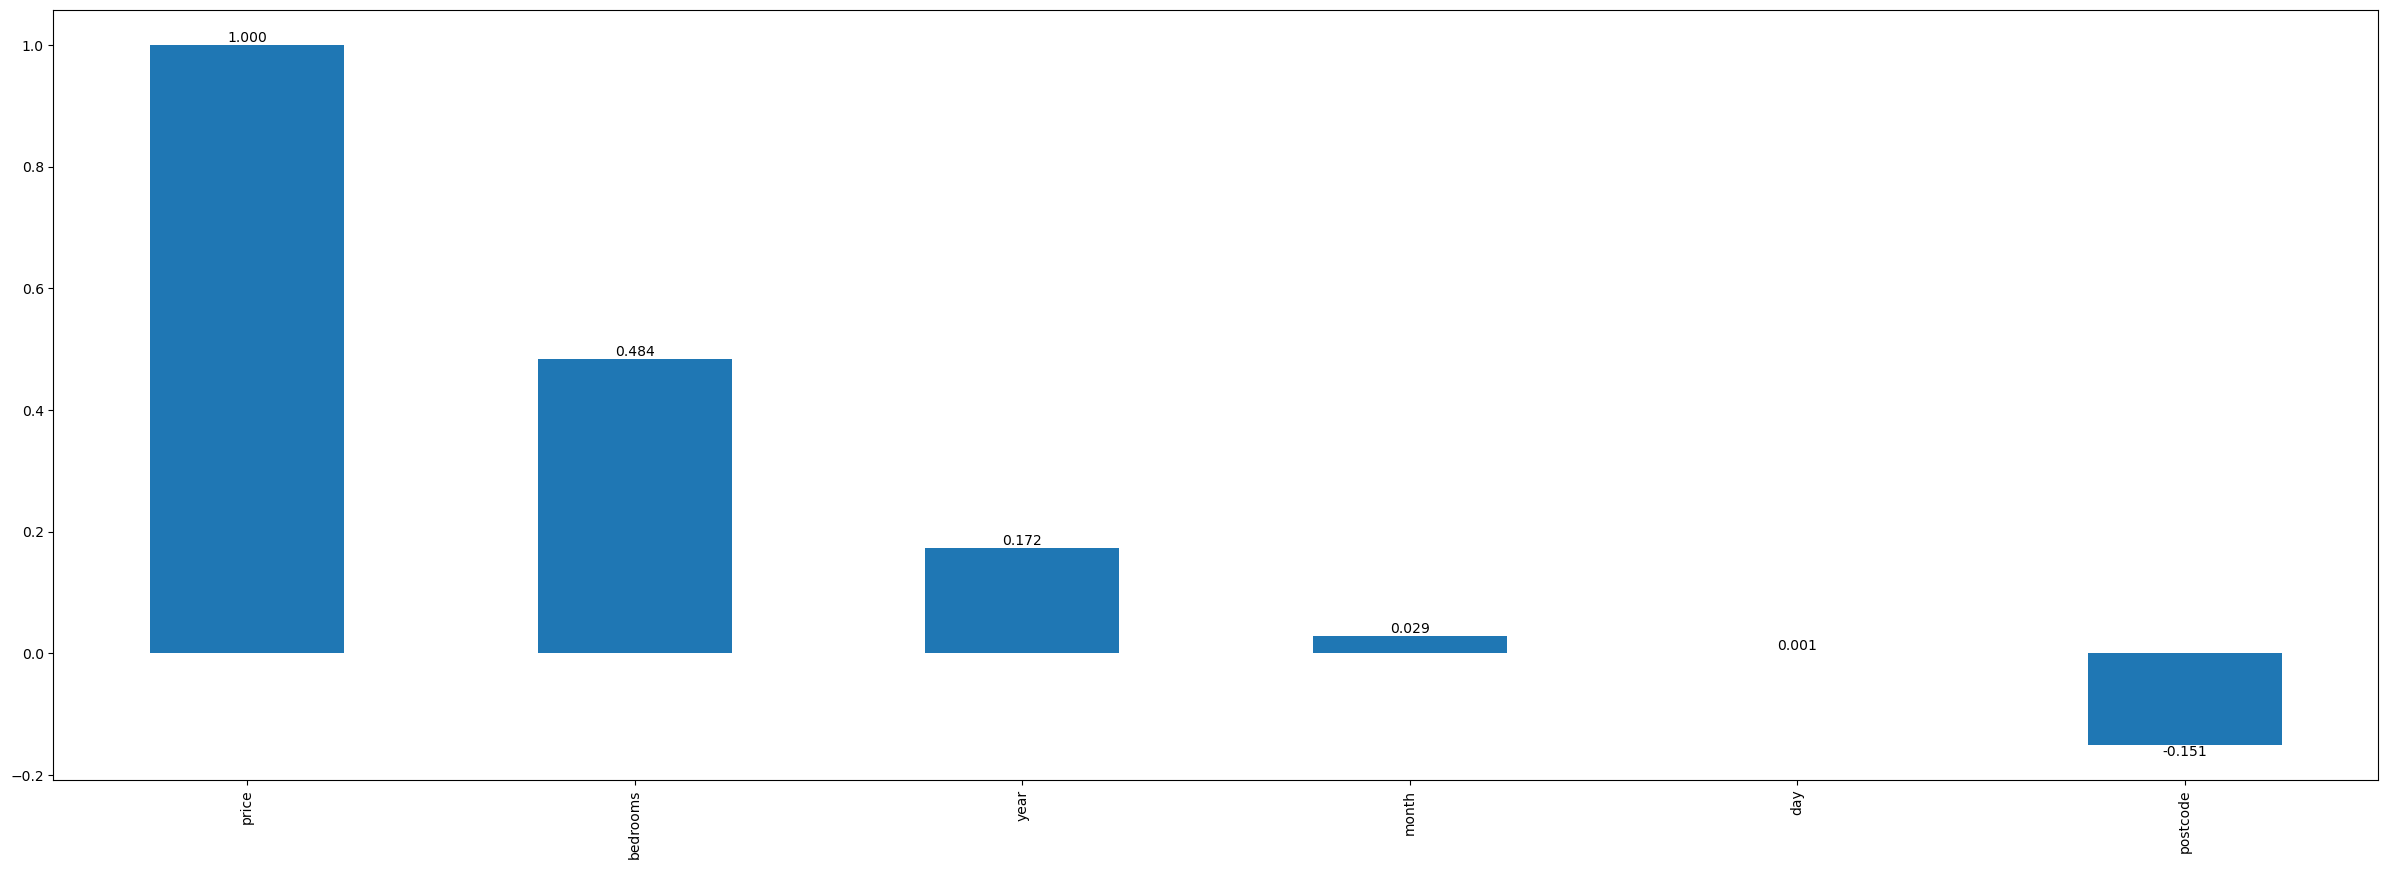

In [41]:
#check the correlation between columns and price variable
plt.figure(figsize=(30,10))
ax=df.corr()['price'].sort_values(ascending=False).plot(kind='bar')
ax.bar_label(ax.containers[0], fmt='{:,.3f}')

The distribution of the price

In [38]:
df.price.value_counts(bins=1000)

(469562.0, 477505.5]      666
(437788.0, 445731.5]      662
(413957.5, 421901.0]      651
(429844.5, 437788.0]      632
(453675.0, 461618.5]      625
                         ... 
(4306272.5, 4314216.0]      0
(4314216.0, 4322159.5]      0
(4322159.5, 4330103.0]      0
(4330103.0, 4338046.5]      0
(4028250.0, 4036193.5]      0
Name: price, Length: 1000, dtype: int64

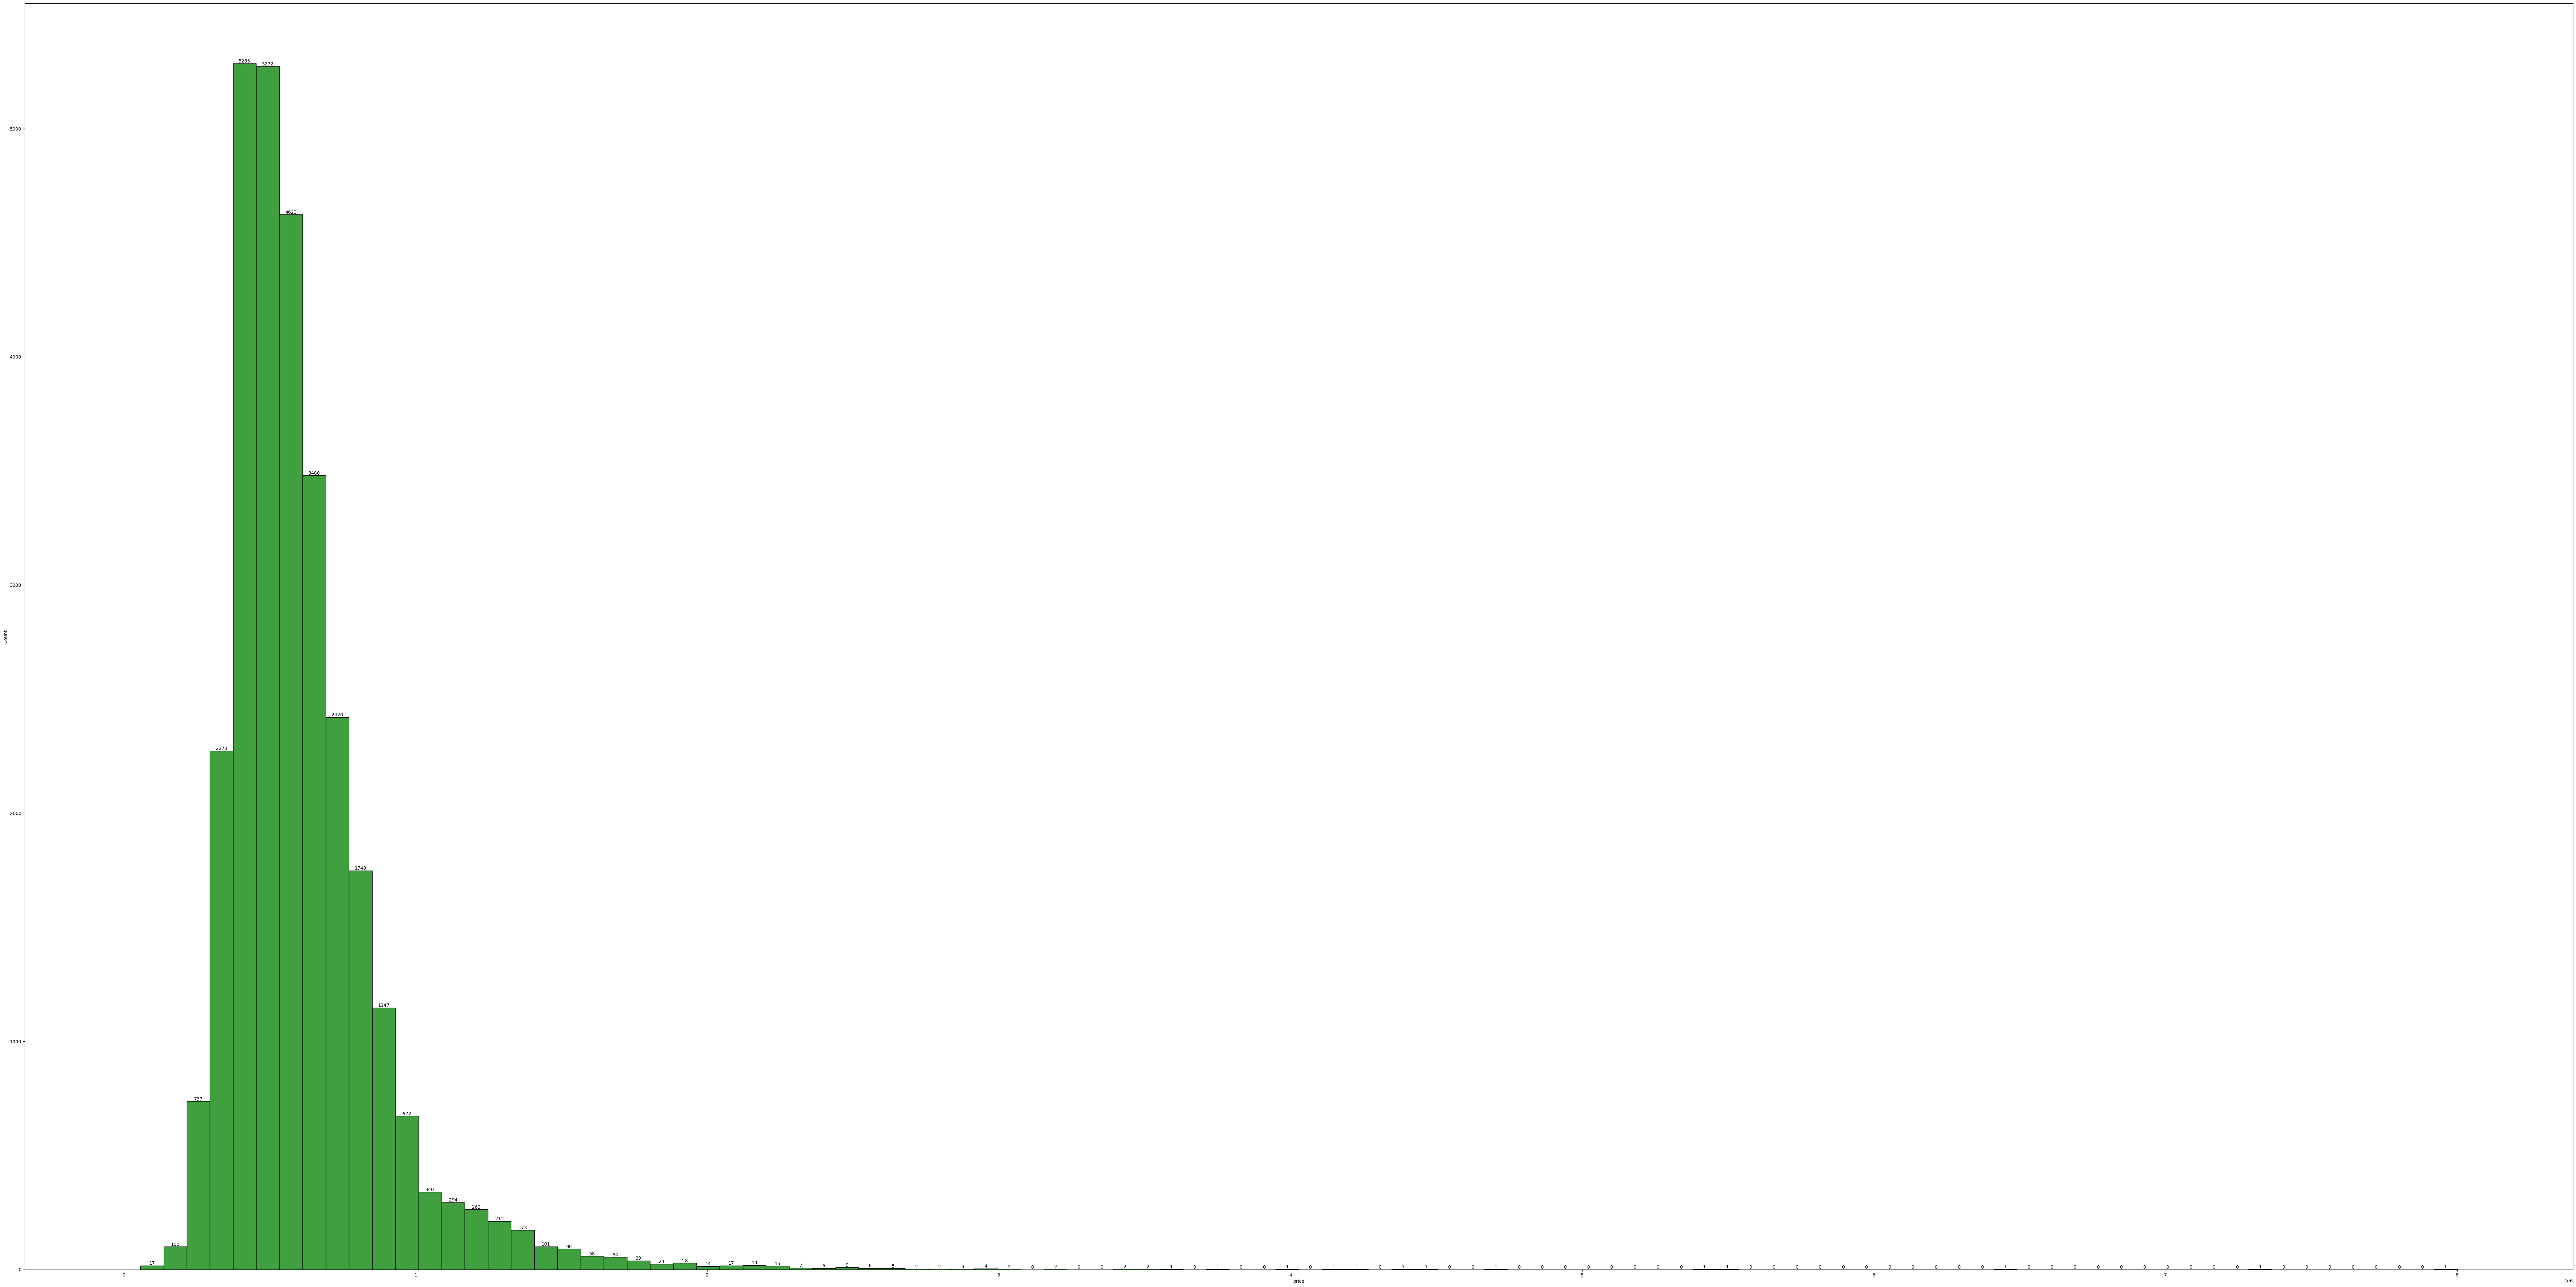

In [40]:
plt.figure(figsize=(100, 50))
#ax=df[column].value_counts().plot(kind='bar')
ax=sns.histplot(df.price,color='g',bins=100)
ax.bar_label(ax.containers[0])
plt.show()

The majority of the price ranges between 450000-550000

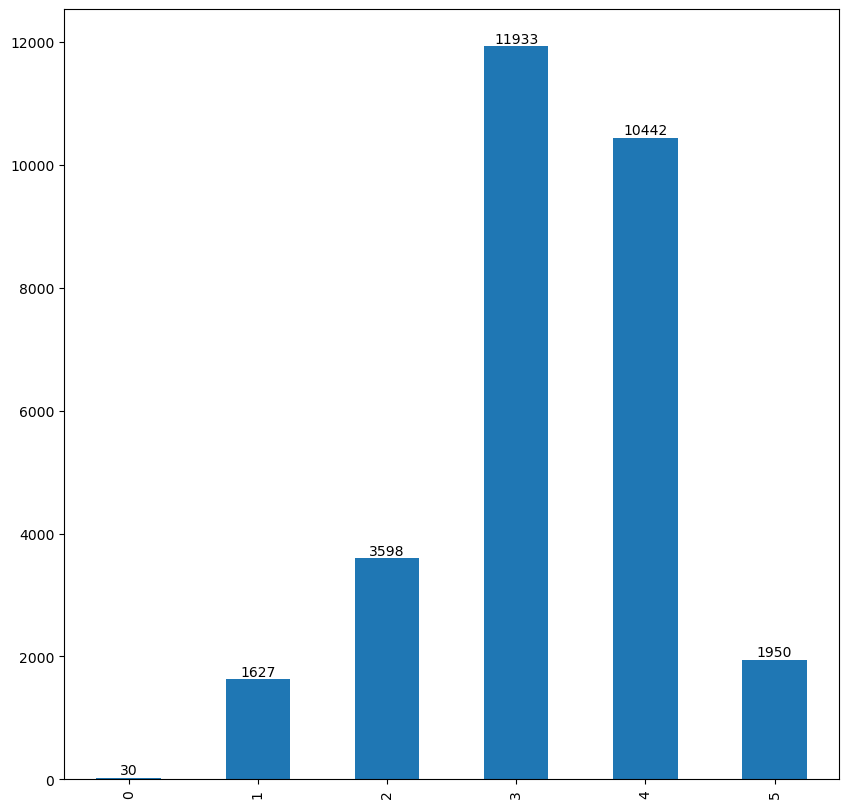

In [48]:
plt.figure(figsize=(10, 10))
ax=df.bedrooms.value_counts().sort_index().plot(kind='bar')
ax.bar_label(ax.containers[0])
plt.show()

The majority of sold houses have 3-4 bedrooms

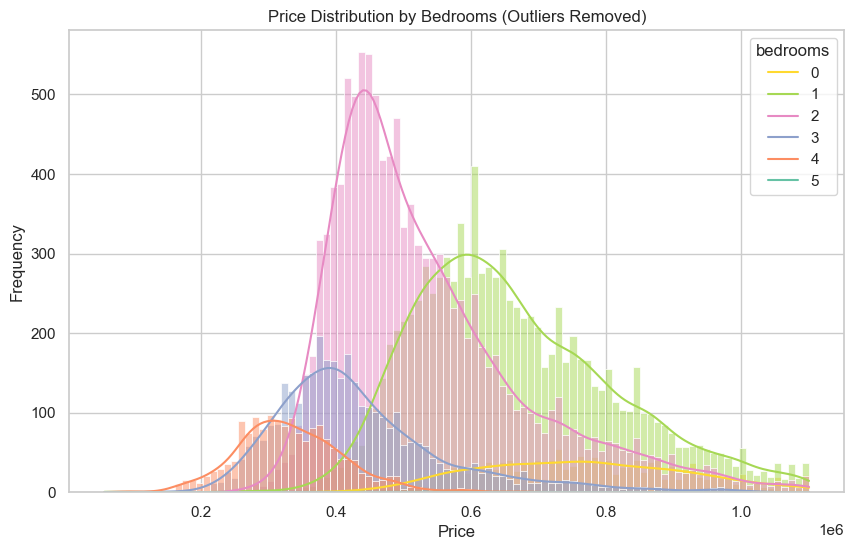

In [58]:
# Set the style for the plot (optional)
sns.set(style="whitegrid")

# Calculate the IQR to remove outliers
Q1 = df.price.quantile(0.25)
Q3 = df.price.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
filtered_df = df[(df.price >= lower_bound) & (df.price <= upper_bound)]

# Create a histogram to visualize income distribution for default and non-default customers
plt.figure(figsize=(10, 6))
sns.histplot(data=filtered_df, x='price', hue='bedrooms', kde=True, bins=100, palette="Set2")
plt.title('Price Distribution by Bedrooms (Outliers Removed)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend(["0","1","2","3","4","5"],title='bedrooms')
plt.show()

The graph shows the majority of the sold house have 1 or 2 bedrooms with varying prices. The increase in the number of bedrooms does not directly translates to increase of price.

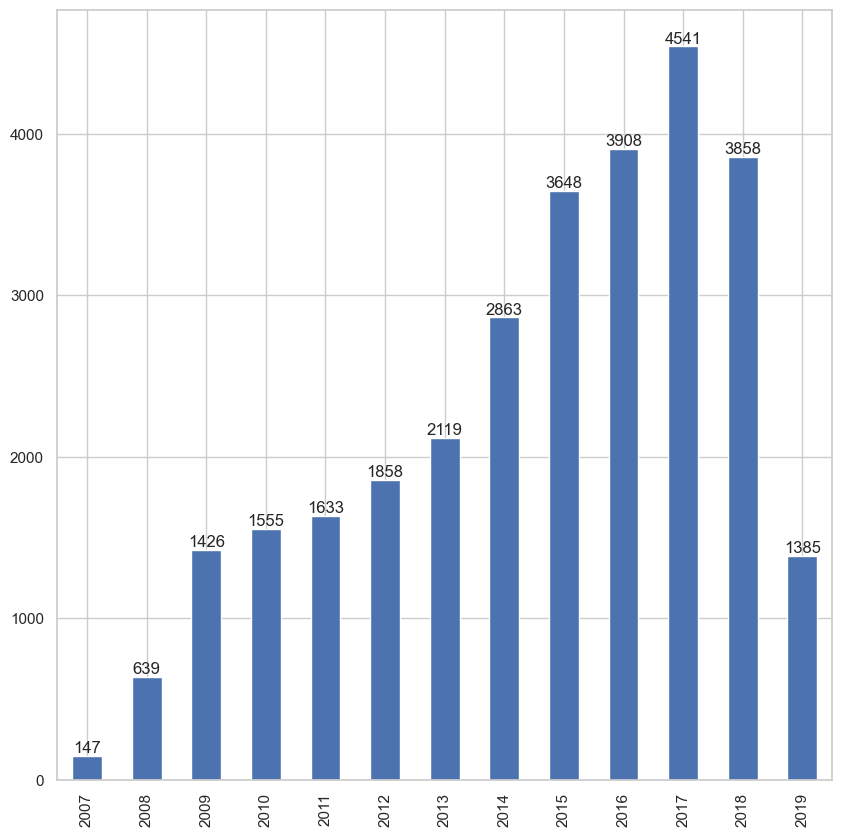

In [59]:
plt.figure(figsize=(10, 10))
ax=df.year.value_counts().sort_index().plot(kind='bar')
ax.bar_label(ax.containers[0])
plt.show()

Most the house sold are between 2014-2018

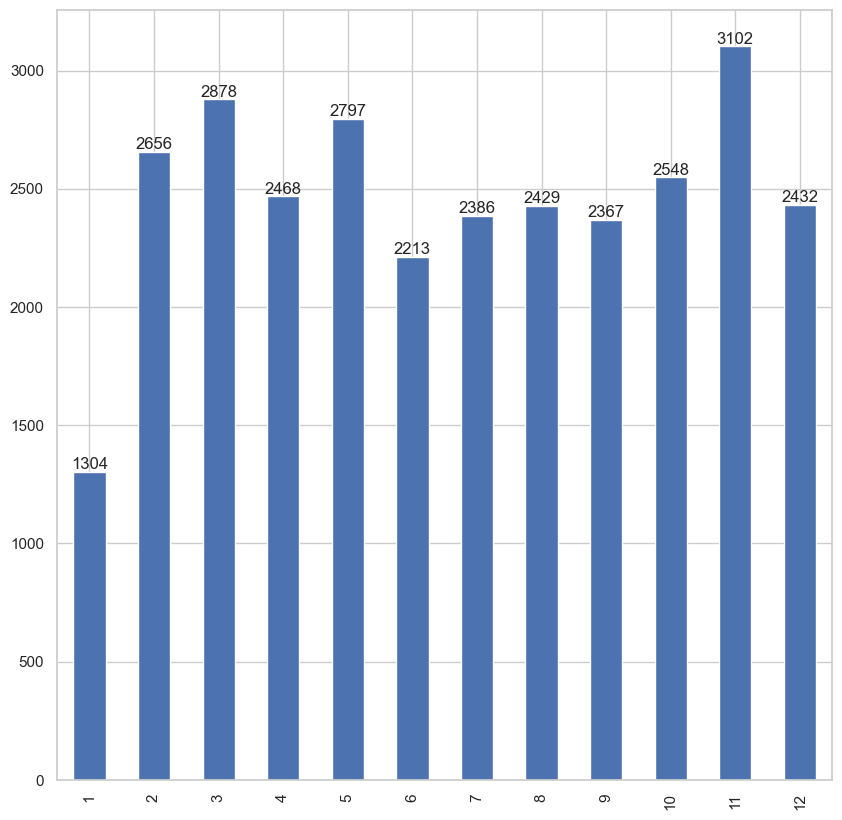

In [60]:
plt.figure(figsize=(10, 10))
ax=df.month.value_counts().sort_index().plot(kind='bar')
ax.bar_label(ax.containers[0])
plt.show()

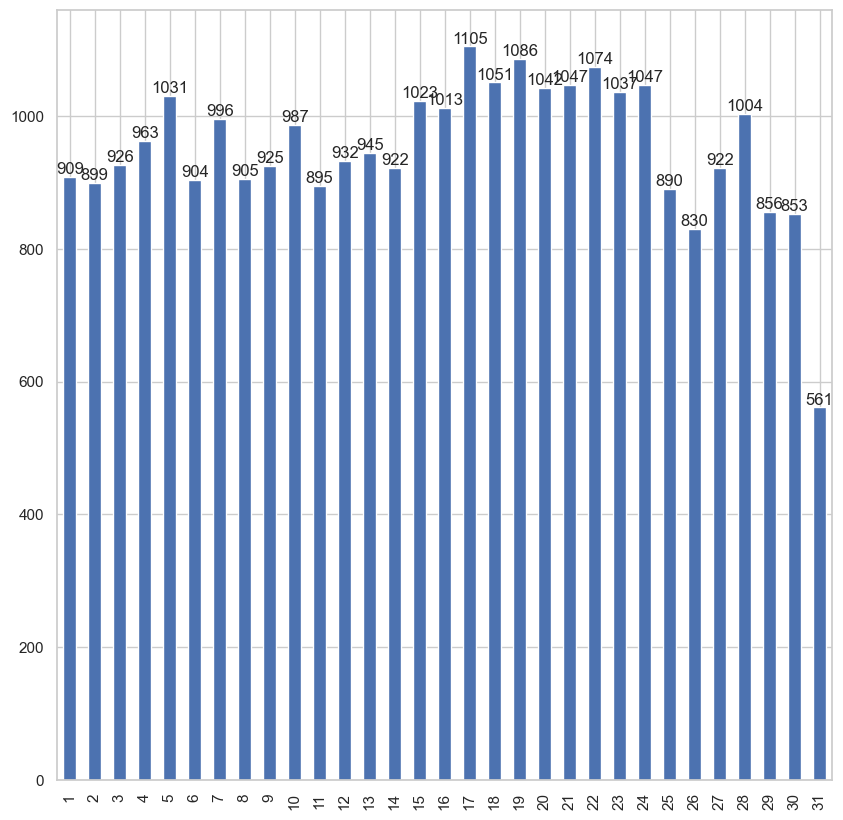

In [61]:
plt.figure(figsize=(10, 10))
ax=df.day.value_counts().sort_index().plot(kind='bar')
ax.bar_label(ax.containers[0])
plt.show()

It's hard to make any conclusion from day or month distributions.

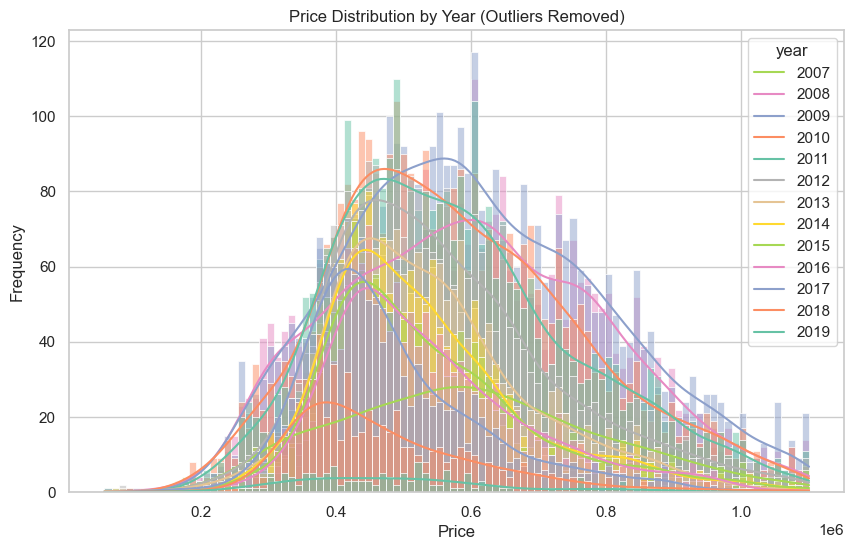

In [62]:
# Set the style for the plot (optional)
sns.set(style="whitegrid")

# Calculate the IQR to remove outliers
Q1 = df.price.quantile(0.25)
Q3 = df.price.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
filtered_df = df[(df.price >= lower_bound) & (df.price <= upper_bound)]

# Create a histogram to visualize income distribution for default and non-default customers
plt.figure(figsize=(10, 6))
sns.histplot(data=filtered_df, x='price', hue='year', kde=True, bins=100, palette="Set2")
plt.title('Price Distribution by Year (Outliers Removed)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend(["2007","2008","2009","2010","2011","2012","2013","2014","2015","2016","2017","2018","2019"],title='year')
plt.show()

Linear Regression

In [12]:
X = df.drop(columns=['price','datesold'])
X = X.iloc[:,:].values
y = df.iloc[:,2].values

In [13]:
X

array([[2607, 'house', 4, 2007, 2, 7],
       [2906, 'house', 3, 2007, 2, 27],
       [2905, 'house', 3, 2007, 3, 7],
       ...,
       [2912, 'unit', 2, 2019, 7, 26],
       [2601, 'unit', 2, 2019, 7, 26],
       [2612, 'unit', 2, 2019, 7, 26]], dtype=object)

In [14]:
y

array([525000, 290000, 328000, ..., 464950, 589000, 775000], dtype=int64)

In [15]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
# make sure to select column that you want to encode, which is not in numerical. In this case, [1]
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [16]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

In [17]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [18]:
# Model Building

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [19]:
# Predicting the test results

y_pred = model.predict(X_test)

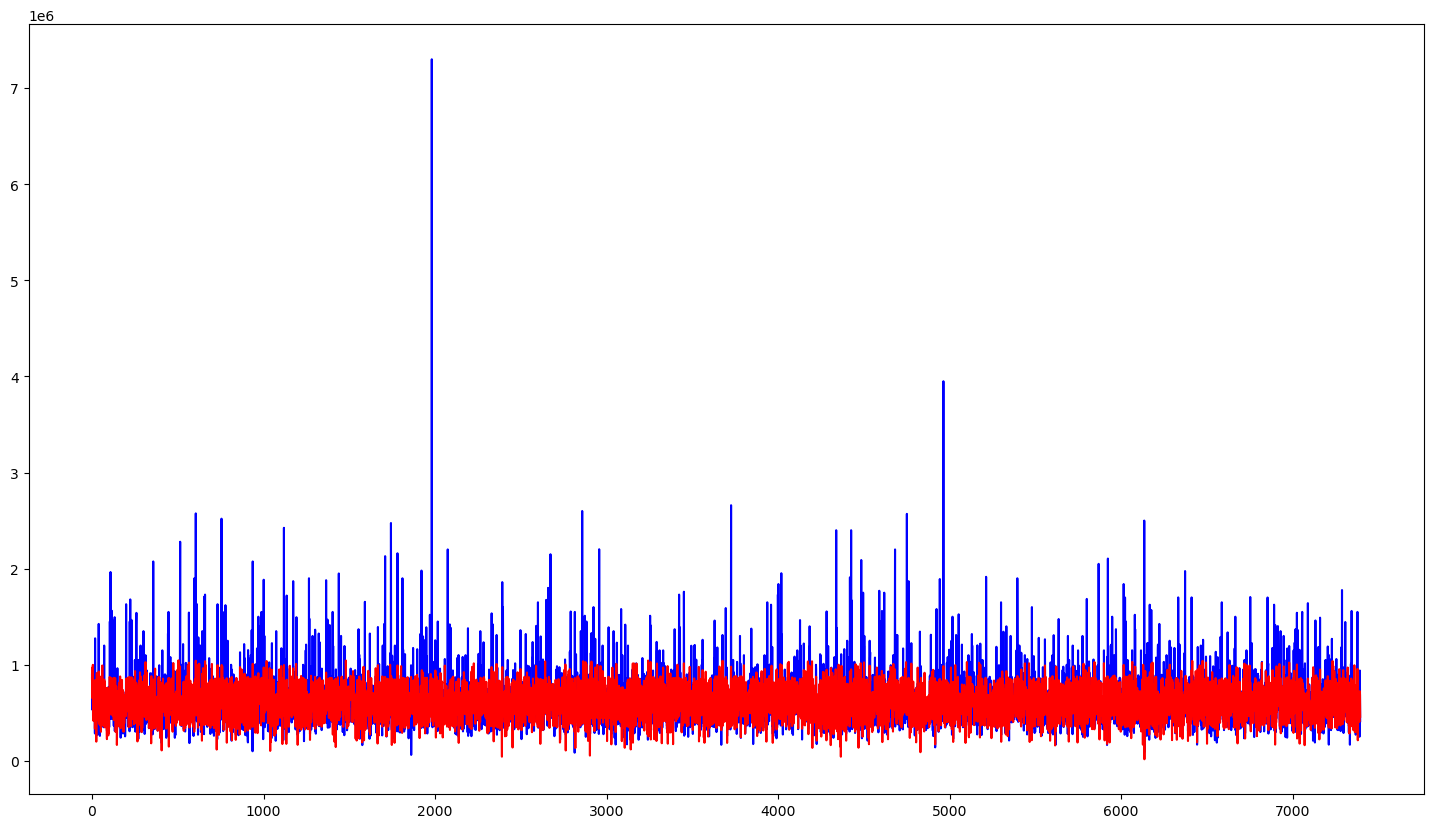

In [20]:
# Plot the test vs prediction data
fig, ax = plt.subplots(figsize=(18, 10))
#plt.scatter(y_test)
plt.plot(y_test, color='blue', label='test')
plt.plot(y_pred, color='red', label='predictions')
plt.show()

In [21]:
import sklearn
import math
#calculate root mean squared error
mse = sklearn.metrics.mean_squared_error(y_test, y_pred)  
rmse = math.sqrt(mse) 
rmse

220808.34091000588

In [23]:
#calculate root mean squared log error
from sklearn.metrics import mean_squared_log_error
msle=mean_squared_log_error(y_test, y_pred)
rmsle=math.sqrt(msle)  
rmsle

0.28595792250203683